In [1]:
#!/usr/bin/env python3
import sys
sys.path.append("..")

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import math
from model import *
from visual_functions import *
from sweep_configs import *
from train import *
%matplotlib inline

Welcome to JupyROOT 6.26/02


## Comparison of Model and Hough Transform Method
### Integration/training of model currently not possible (ROOT related)
### -> make comparison in python:
### -> create reference set with ideal HTM
### -> calculate accuracy/loss with model
### -> calcucate accuracy/loss with standard HTM

load data from  ../data/features.csv  -> 1000  events loaded
1000


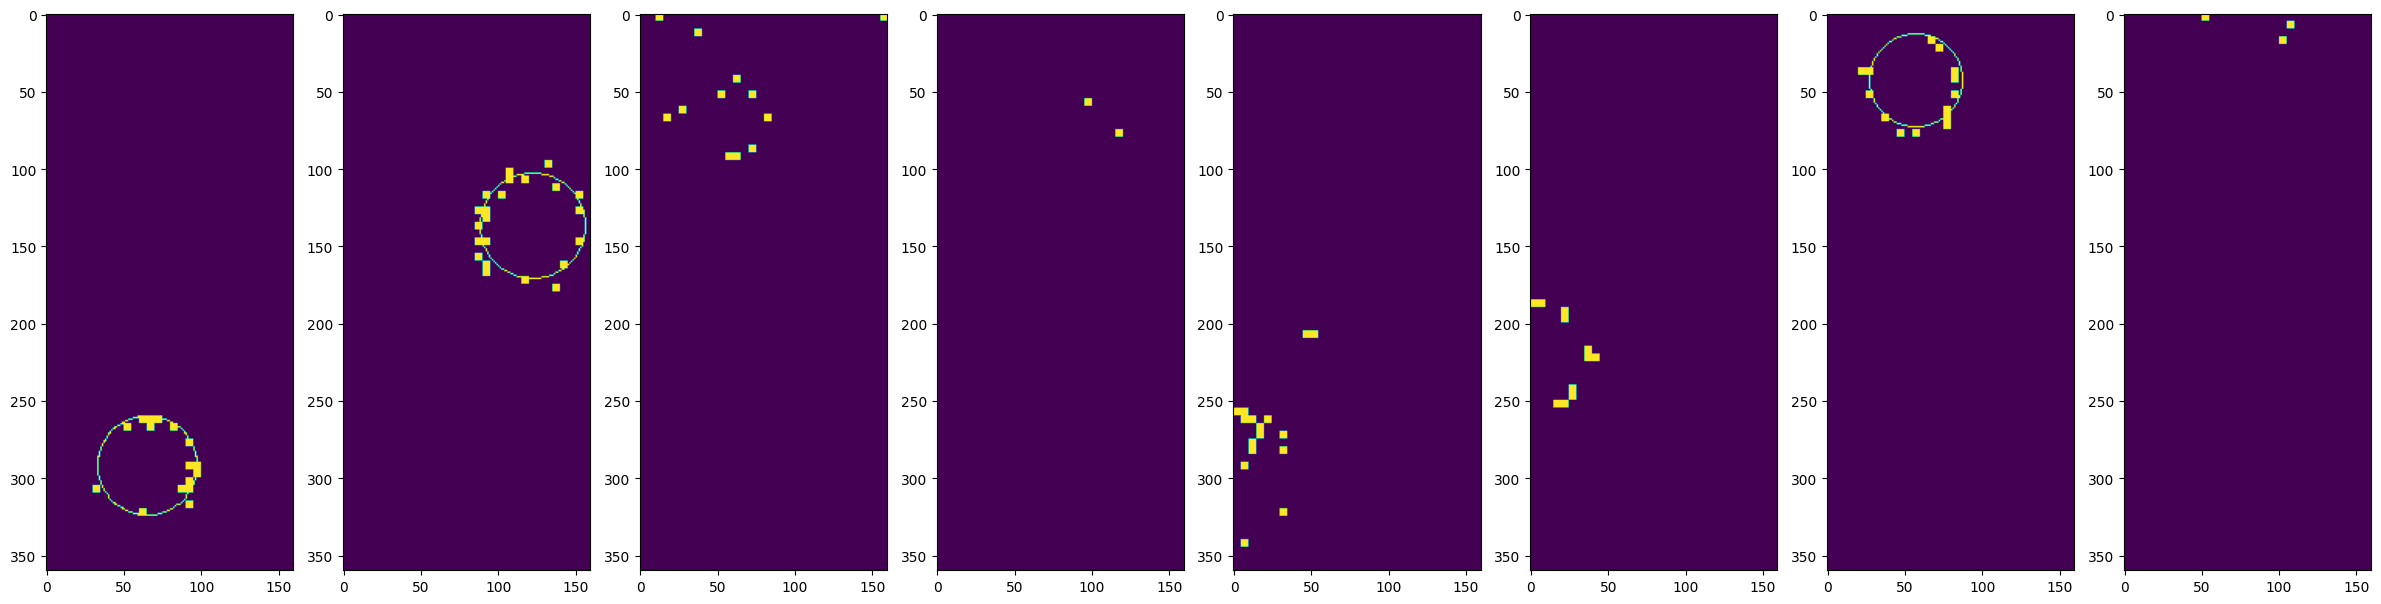

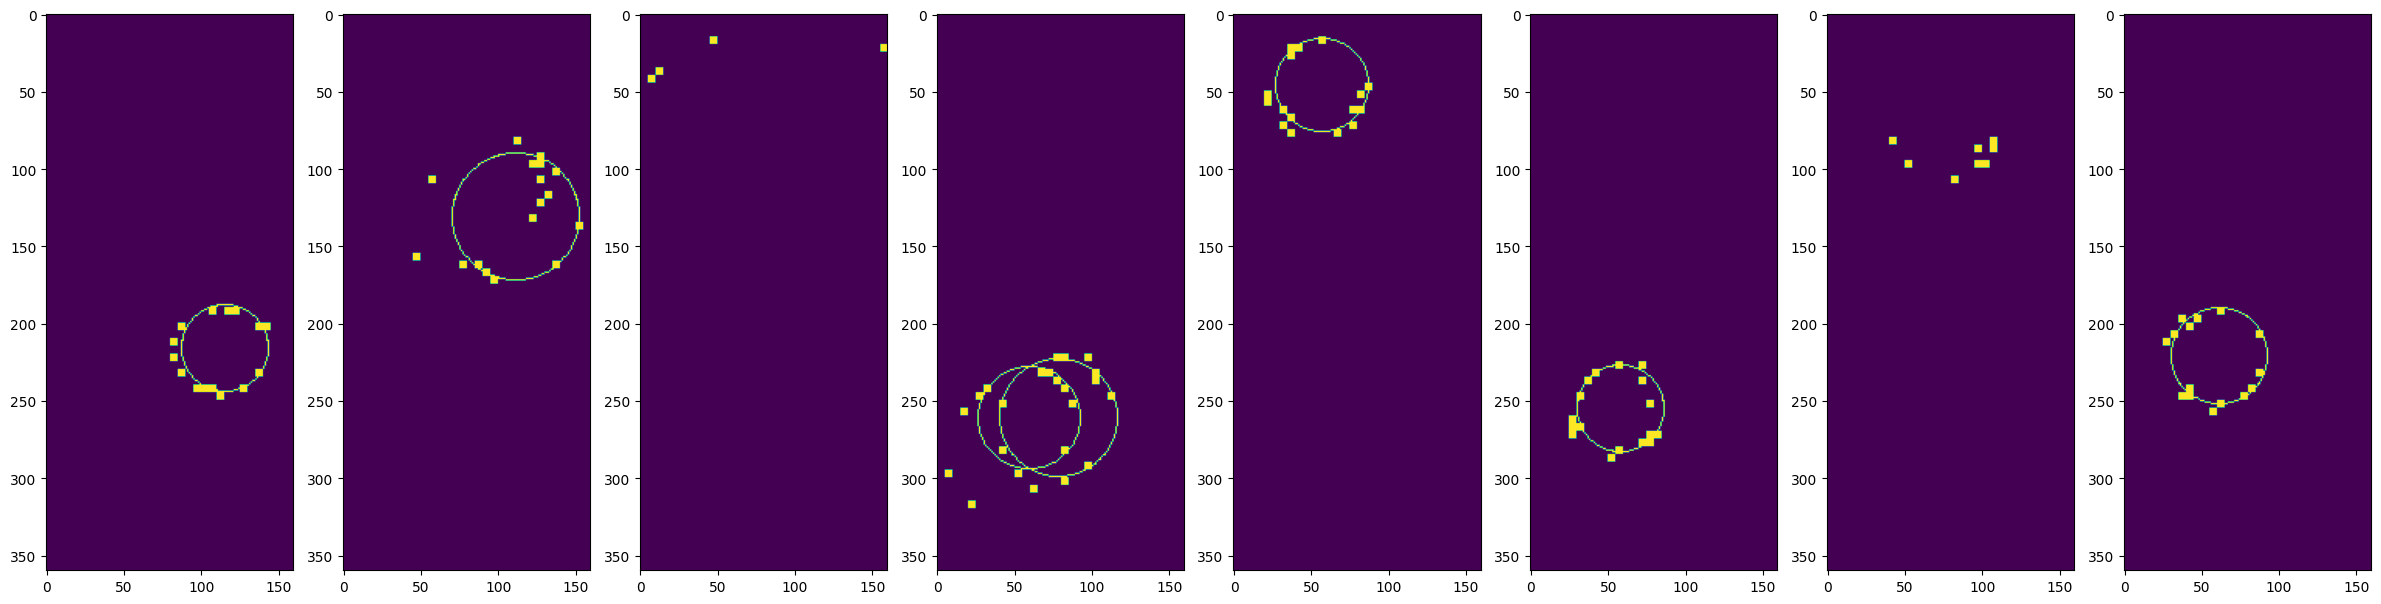

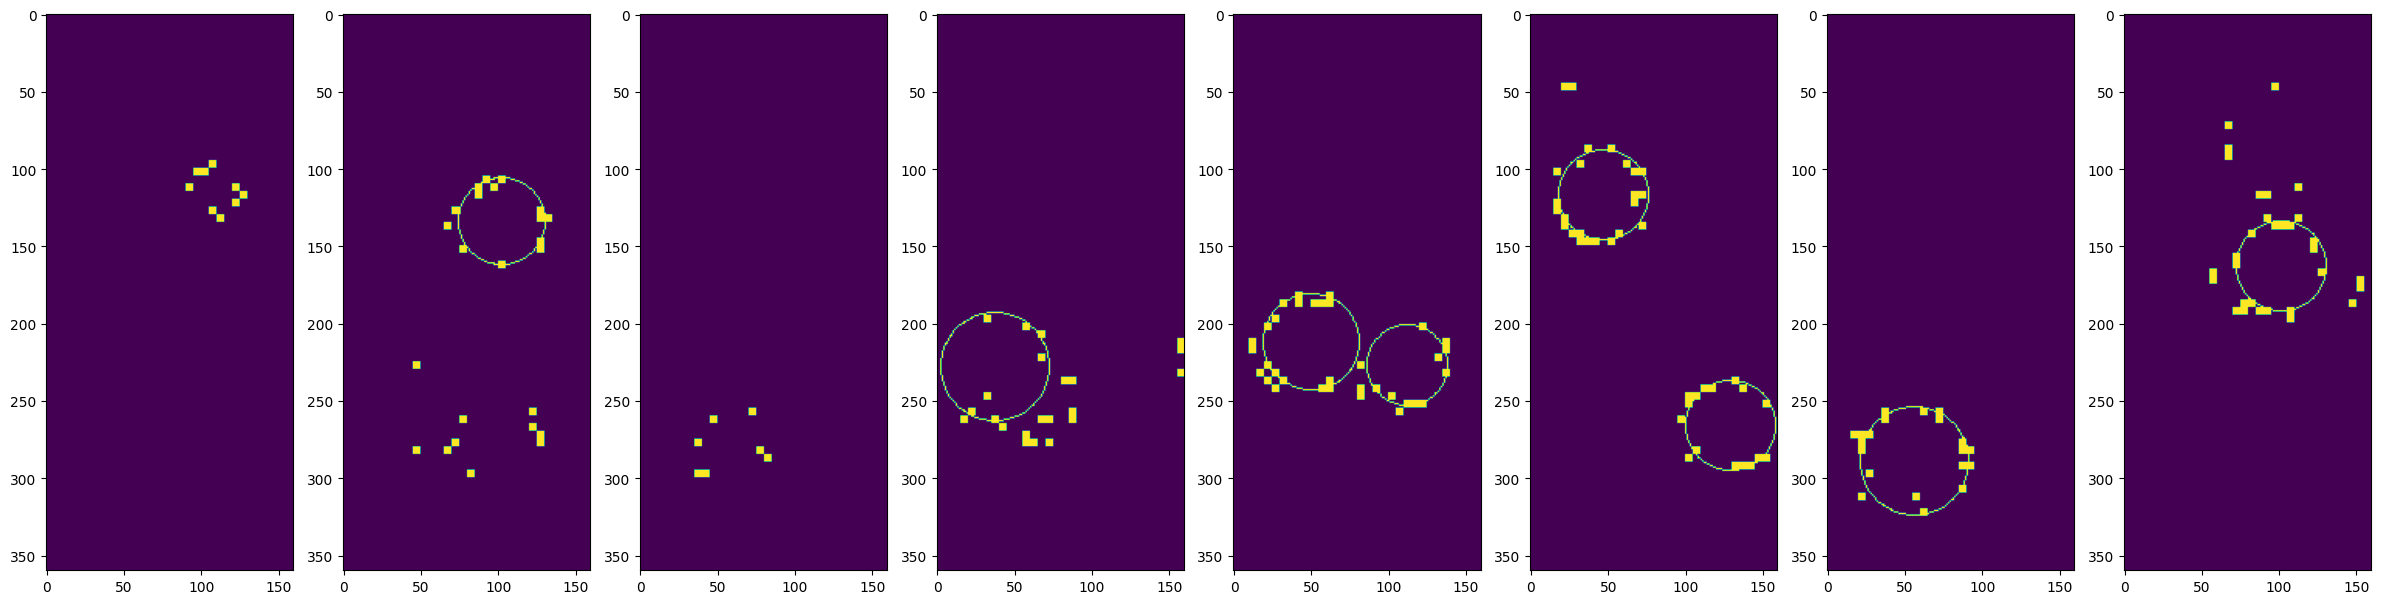

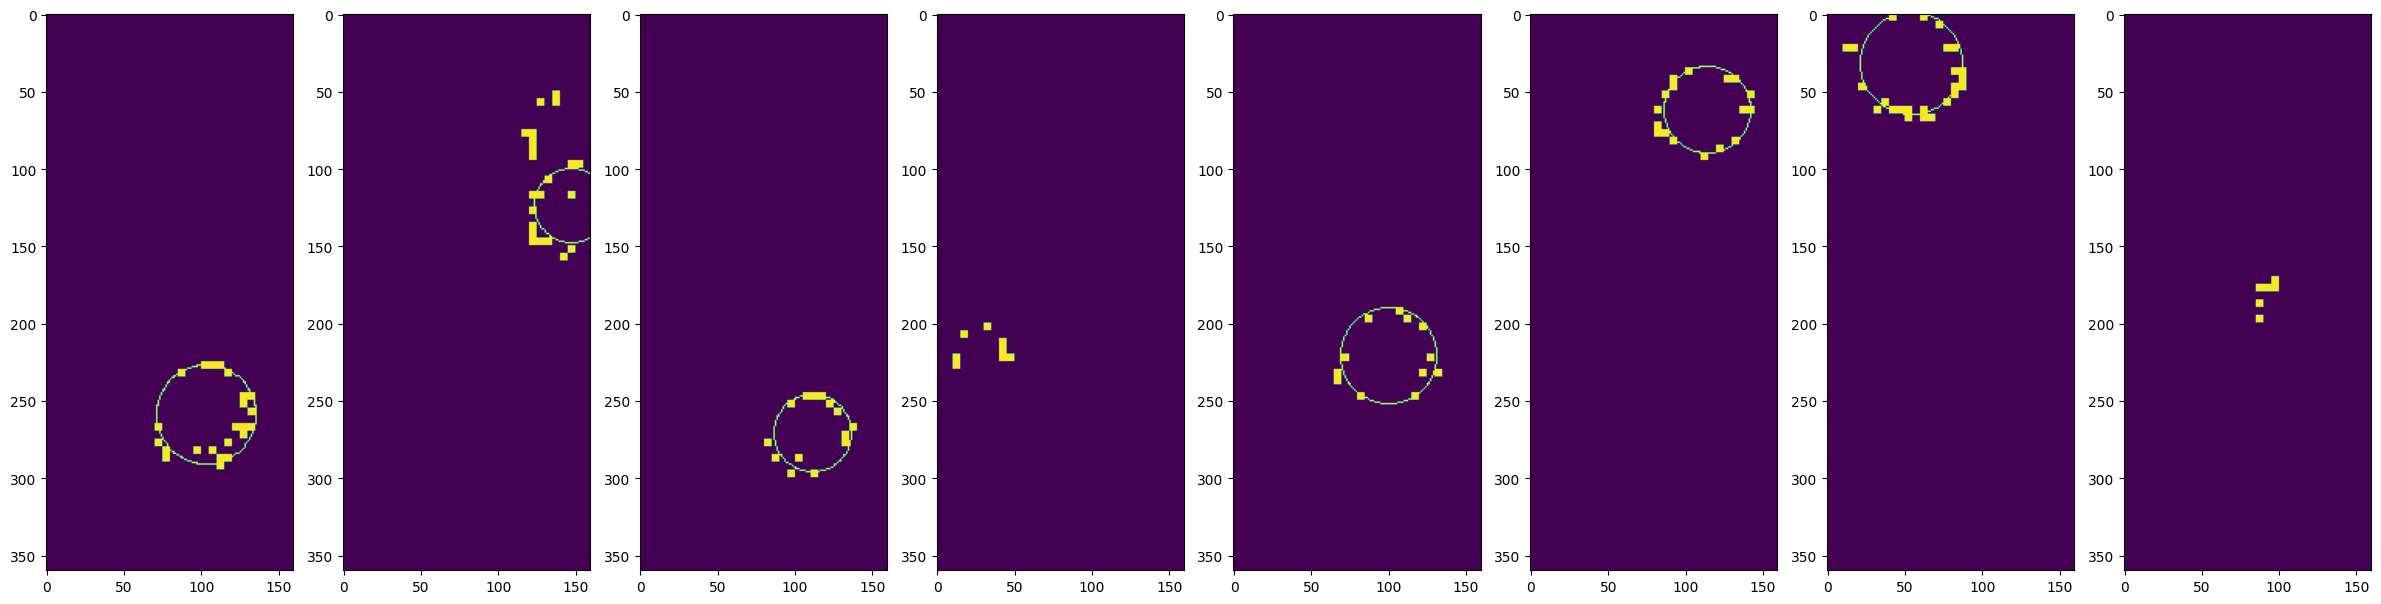

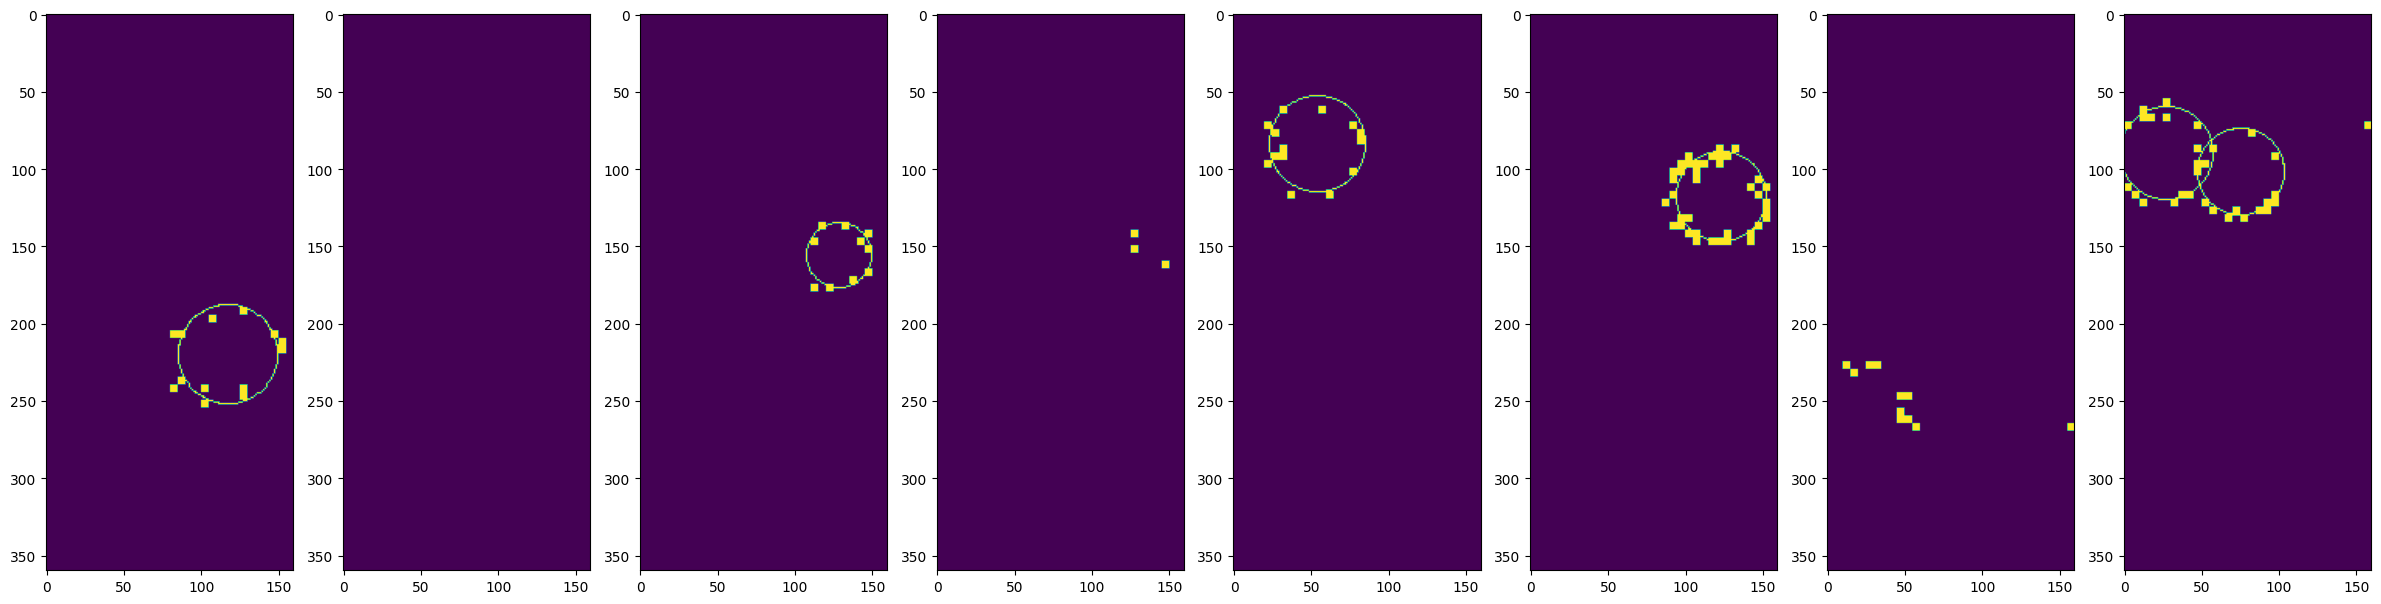

2022-05-31 14:22:17.791697: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 14:22:17.815522: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 14:22:17.815668: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 14:22:17.816108: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [2]:
# load data file and some preprocessing
def loadFeatures(datafile, pixel_x = 32, pixel_y = 72):
    with open(datafile, 'r') as temp_f:
        col_count = [ len(l.split(",")) for l in temp_f.readlines() ]
    column_names = [i for i in range(0, max(col_count))]
    hits = pd.read_csv(datafile,header=None ,index_col=0,comment='#',
                       delimiter=",", nrows=
                       20000,names=column_names).values.astype('int32')
    hits[hits < 0] = 0
    hits_temp = np.zeros([len(hits[:,0]), pixel_x*pixel_y])
    for i in range(len(hits[:,0])):
        for j in range(len(hits[0,:])):
            if hits[i,j]==0:
                break
            hits_temp[i,hits[i,j]-1]+=1
    hits_temp = tf.reshape(hits_temp, [len(hits[:,0]), pixel_y, pixel_x])
    hits_temp = tf.clip_by_value(hits_temp, clip_value_min=0., clip_value_max=1.)
    hits = tf.cast(hits_temp[..., tf.newaxis],dtype=tf.float32)
    print('load data from  ' + datafile + '  -> ' + str(len(hits[:])) + '  events loaded' )
    return hits

def loadParameters(datafile):
    with open(datafile, 'r') as f:
        lines = f.readlines()
        n = len(lines)
    params = np.zeros((n,15))
    for i, line in enumerate(lines):
        line = line.strip().split(",")
        line.remove("")
        line = np.array([float(x) for x in line])
        for j, par in enumerate(line):
            if (math.isnan(par)):
                par = 0
            try:
                params[i,j] = np.round(par, 2)
            except IndexError as e:
                pass
    np.set_printoptions(threshold=np.size(params))
    return params

x = np.array(loadFeatures("../data/features.csv"))
y = loadParameters("../data/targets.csv")
print(y.shape[0])

hough = np.array([plot_single_event(x[i], y[i]) for  i in range(y.shape[0])])
for i in range(5):
    display_data(hough, i)
#    plt.imshow(plot_single_event(x[i], y[i]))
#    plt.show()
#    print(y[i])

32/32 [==============================] - 1s 22ms/step - loss: 39.5732 - acc: 0.8080


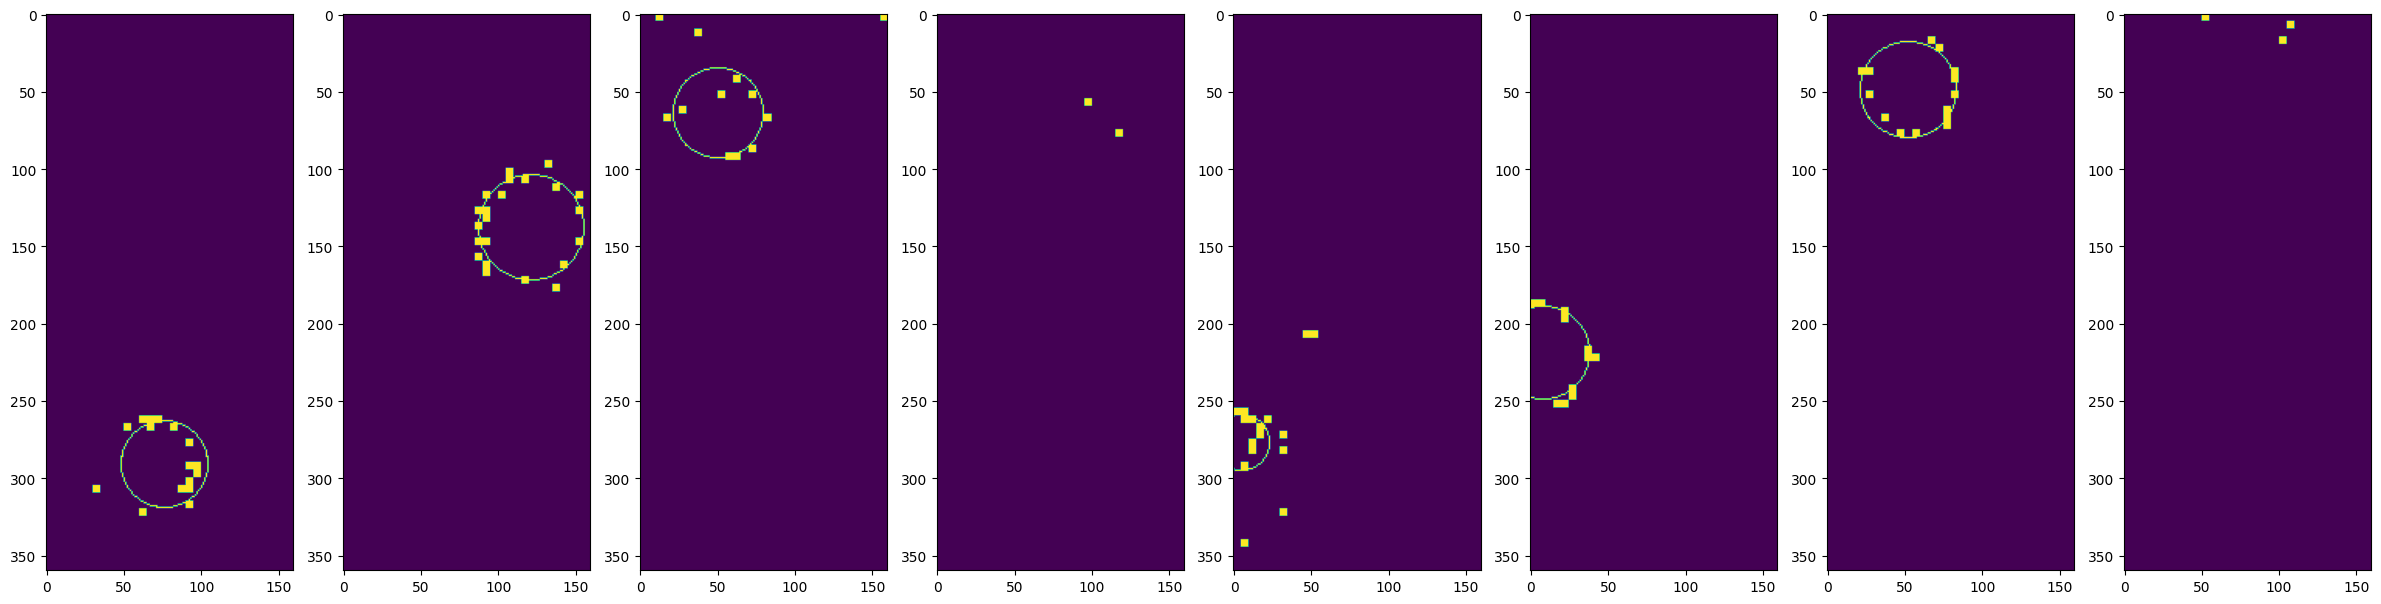

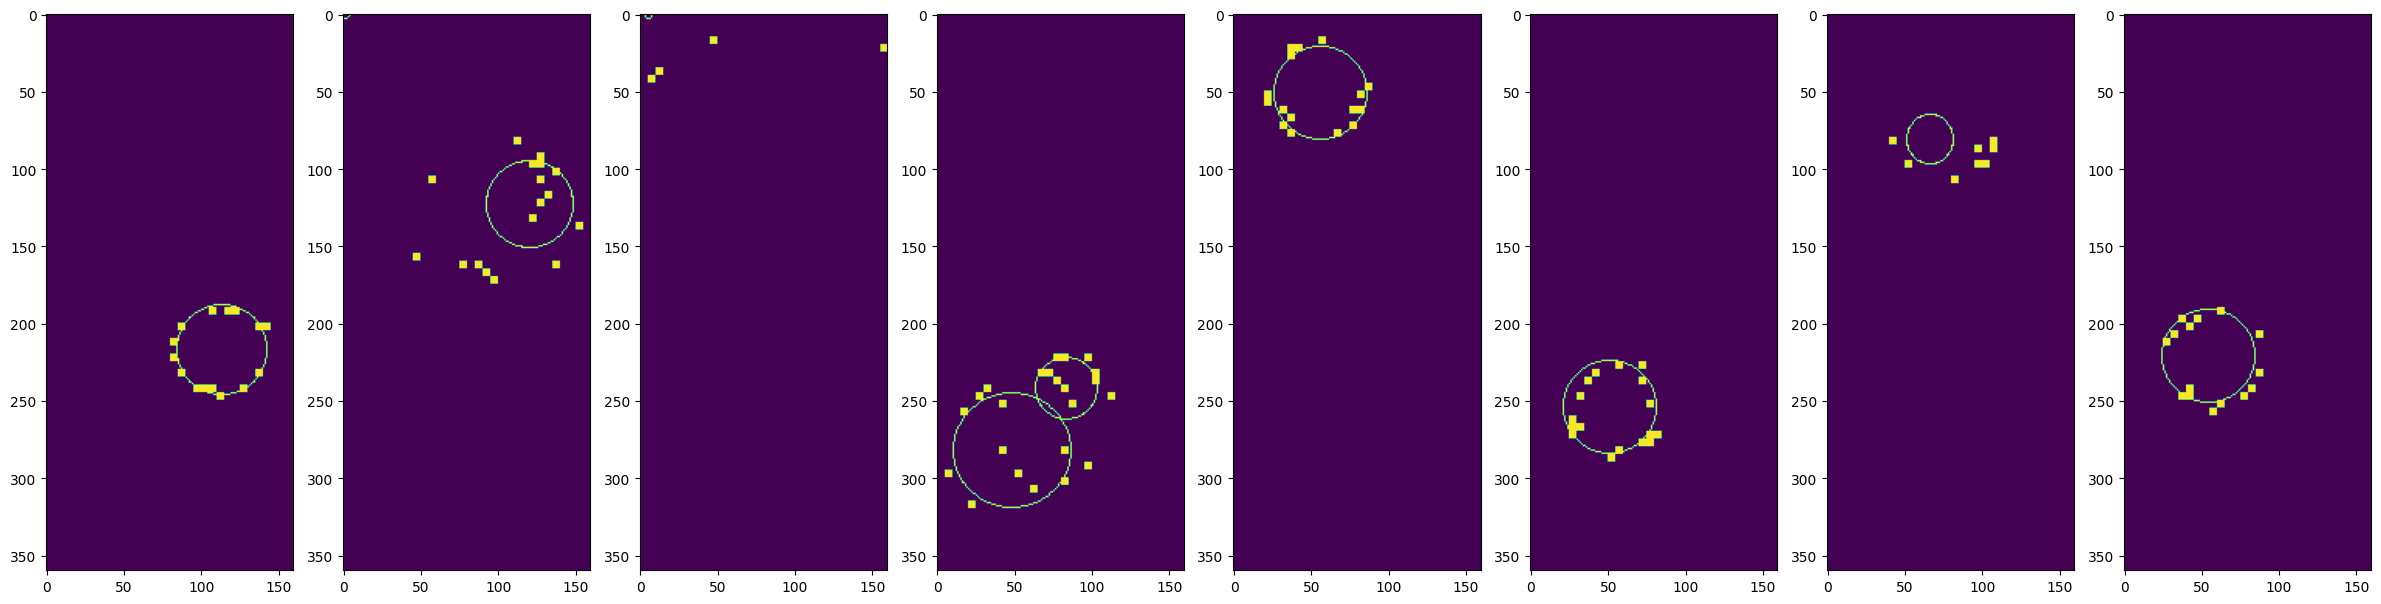

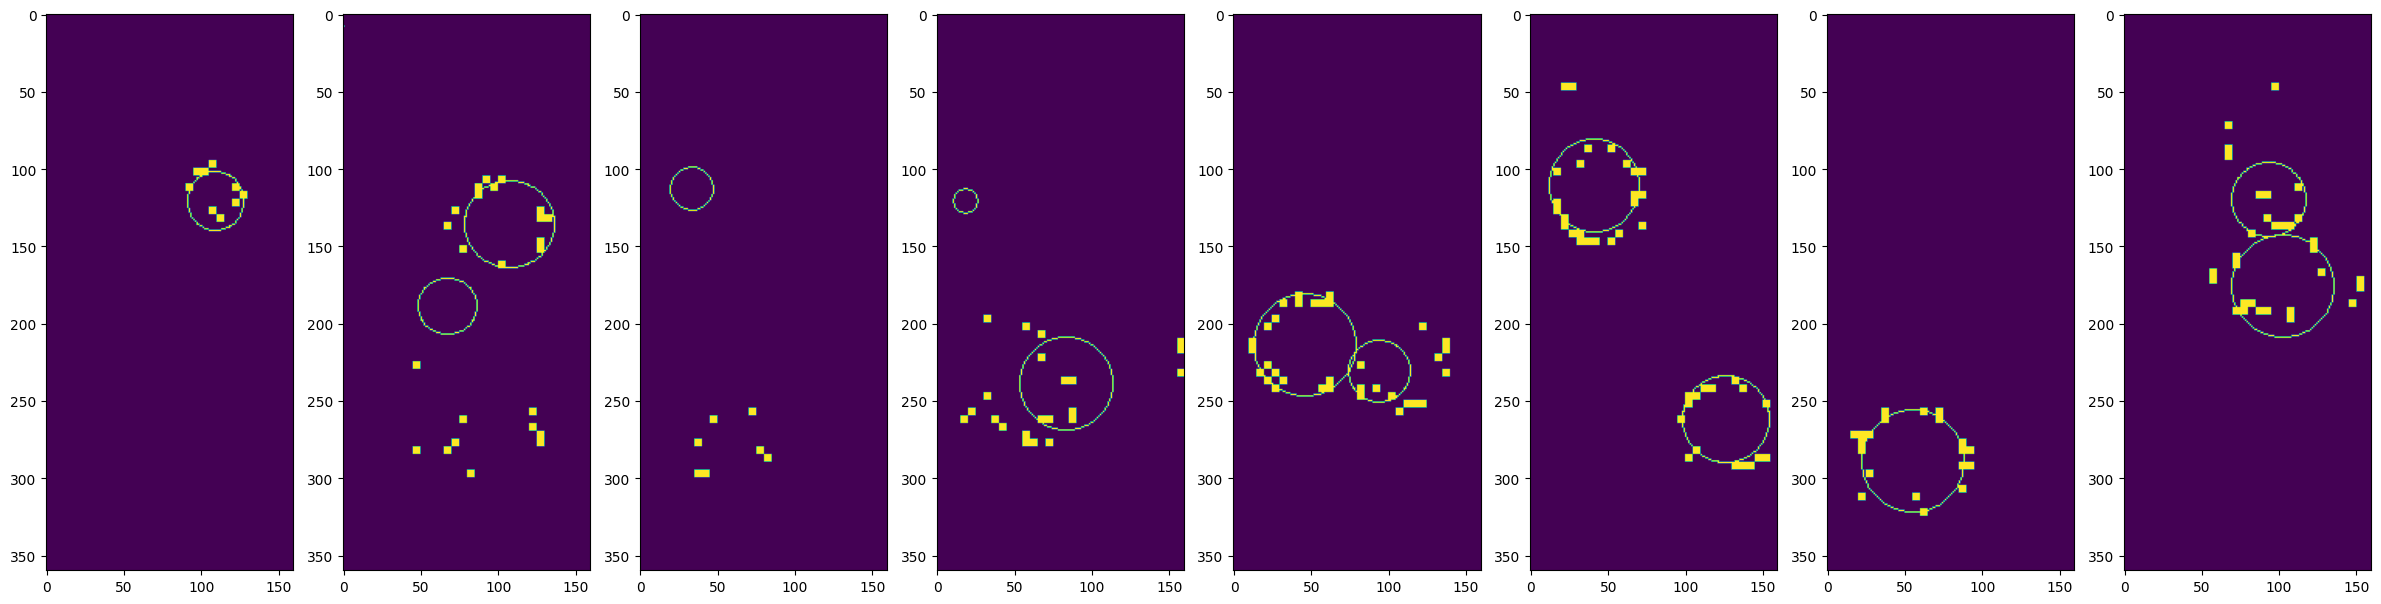

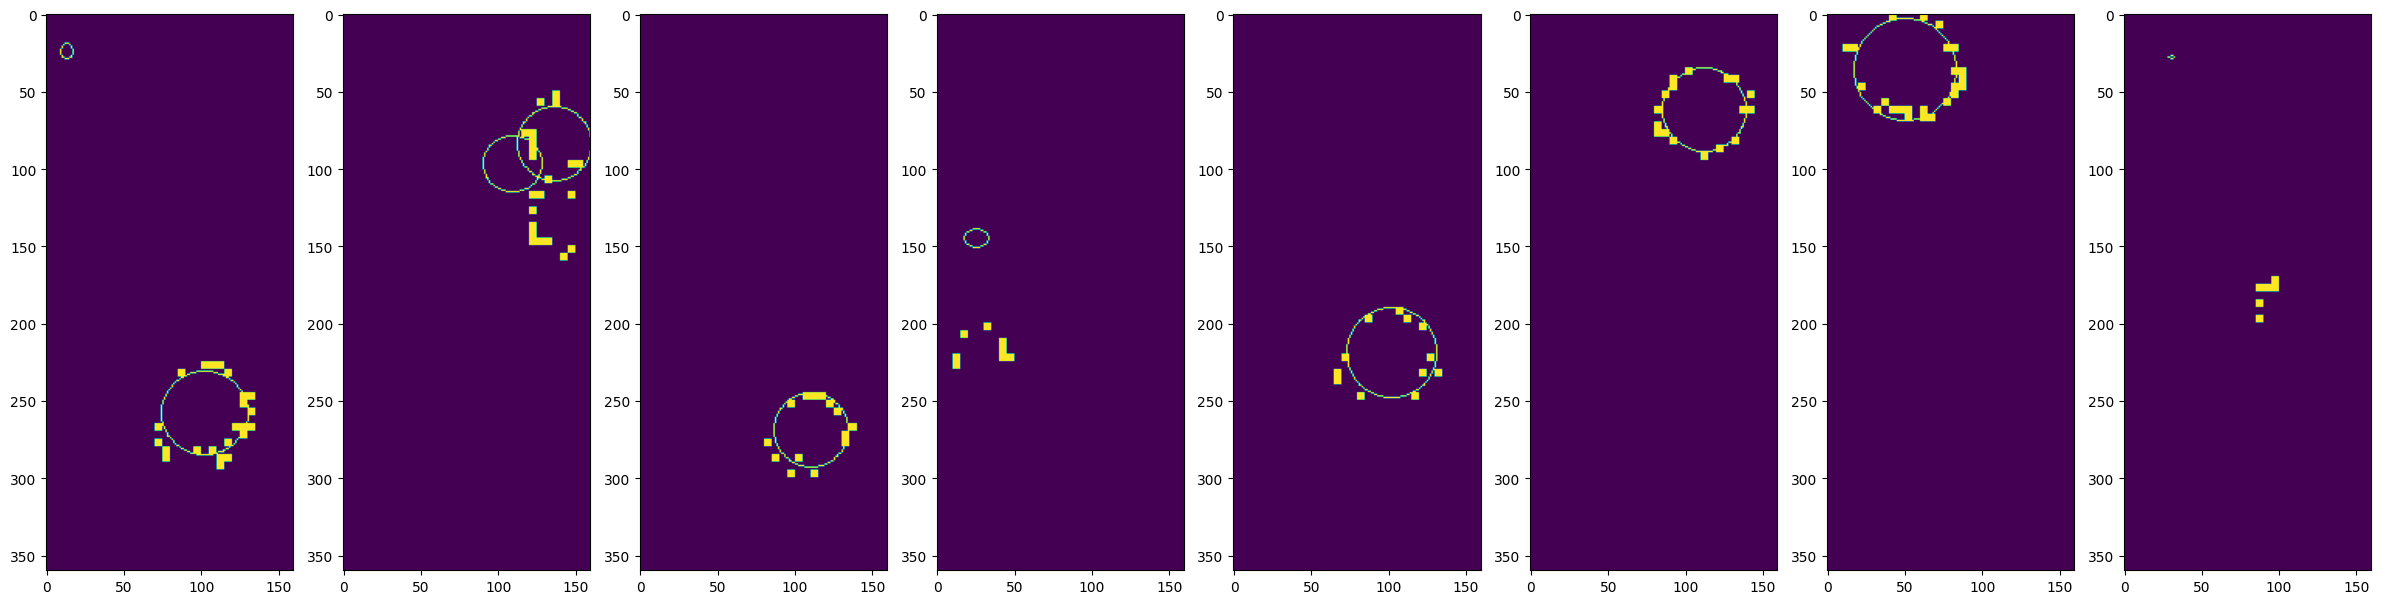

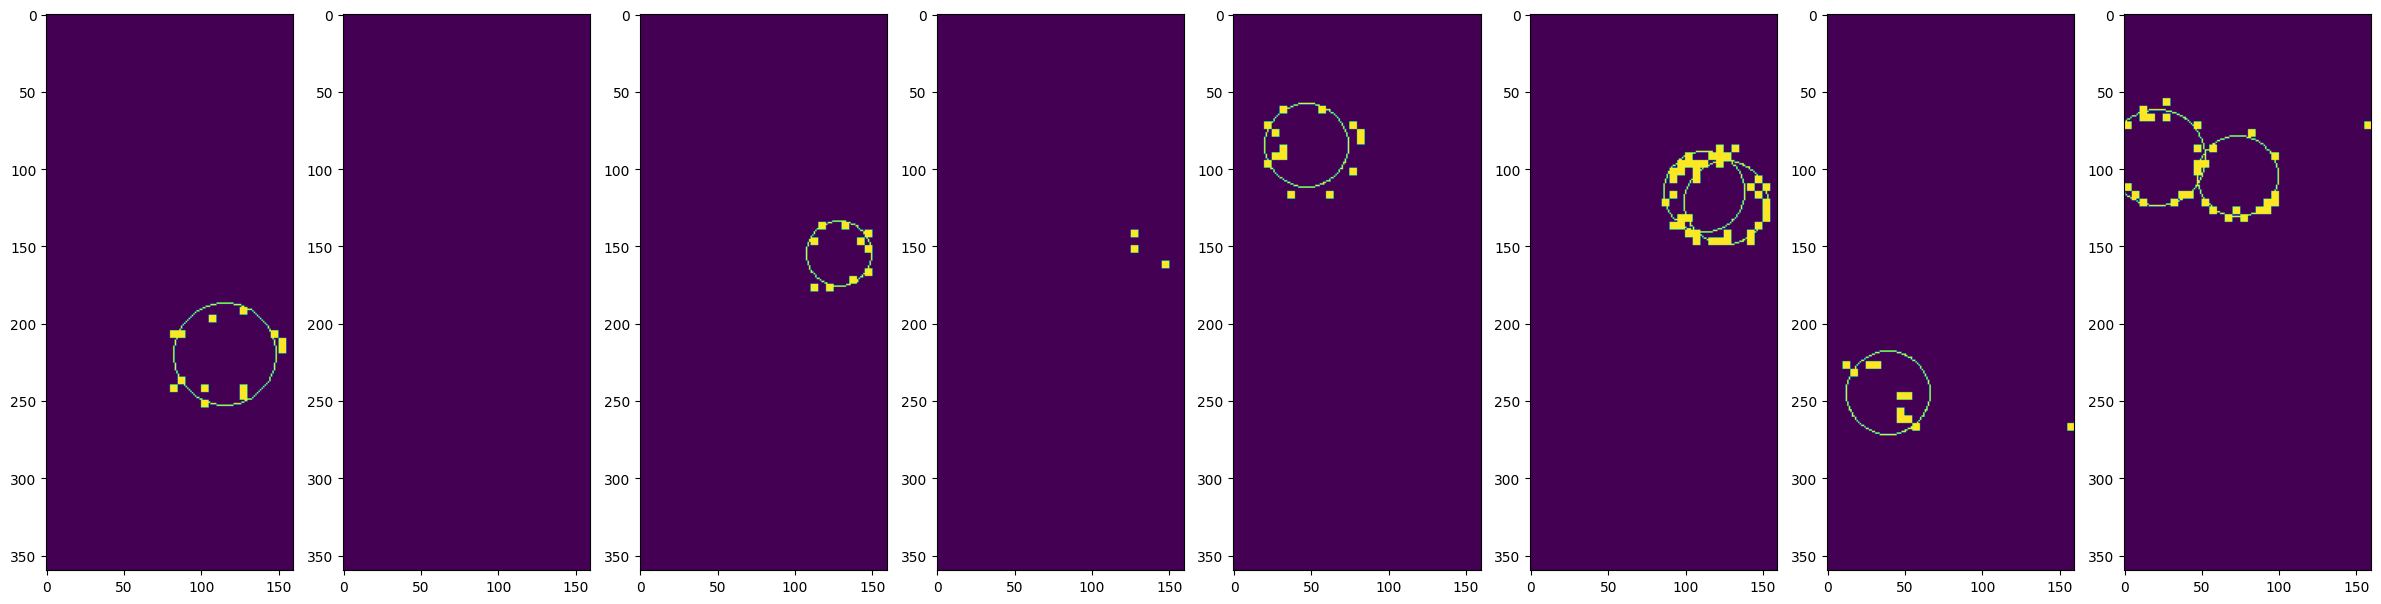

In [4]:
model = tf.keras.models.load_model("../models/checkpoints/generator-202205310736.model")
#model = tf.keras.models.load_model("../models/bmsf.model")
model.evaluate(x, y)

for i in range(5):
    show_predict(x, model, i)